In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
model_db = pd.read_csv('r1_r2_annotations_liwc.csv', sep=';')
print(model_db.shape)
model_db.head(5)

(521, 129)


,text,proc_text,A1,A2,A3,A4,A5,A6,majority_vote,roundID,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,Fuck you china. I was 2 years clear of severe ...,Fuck you china. I was 2 years clear of severe ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,26.92,7.69,3.85,0.0,0.00,3.85,11.54,0.0
1,Feeling so off today and I can’t tell if this ...,Feeling so off today and I can’t tell if this ...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,0.00,28.00,12.00,0.00,0.0,0.00,8.00,8.00,16.0
2,Good lord people we need to stop having people...,Good lord people we need to stop having people...,PP,UN,PP,PO,PP,PP,PP,Round1,...,0.0,0.00,19.05,4.76,0.00,0.0,0.00,4.76,9.52,0.0
3,"I'm telling yall, Chill the fuck out!! This Vi...","I'm telling yall, Chill the fuck out!! This Vi...",PO,PO,PO,PO,PO,PP,PO,Round1,...,0.0,0.00,37.21,4.65,2.33,0.0,23.26,2.33,4.65,0.0
4,Episode of #CoronaVirus panic. Man took his gl...,Episode of #CoronaVirus panic. Man took his gl...,PP,PP,PP,PP,PP,PP,PP,Round1,...,0.0,1.72,20.69,10.34,5.17,0.0,0.00,3.45,1.72,0.0


In [68]:
print('datatypes:')
print(model_db.dtypes)
total_null_values = model_db.isnull().sum().sum()
null_values_per_column = model_db.isnull().sum()
print('')
print('')
print(f"Total null values in the DataFrame: {total_null_values}")
print("\nNull values per column:")
print(null_values_per_column)

train_df datatypes:
text          object
proc_text     object
A1            object
A2            object
A3            object
              ...   
QMark        float64
Exclam       float64
Apostro      float64
OtherP       float64
Emoji        float64
Length: 129, dtype: object


Total null values in the DataFrame: 0

Null values per column:
text         0
proc_text    0
A1           0
A2           0
A3           0
            ..
QMark        0
Exclam       0
Apostro      0
OtherP       0
Emoji        0
Length: 129, dtype: int64


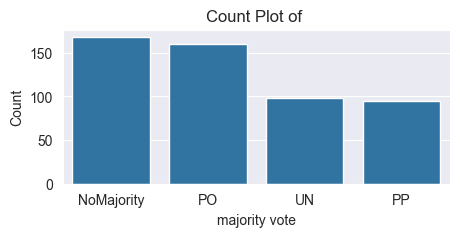

In [69]:
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='majority_vote', order=model_db['majority_vote'].value_counts().index)
plt.xlabel('majority vote')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

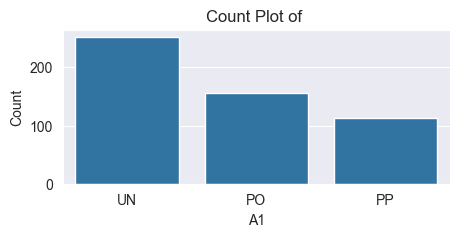

In [70]:
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='A1', order=model_db['A1'].value_counts().index)
plt.xlabel('A1')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()
model_db['A5'] = model_db.A5.map(lambda x: x.strip())

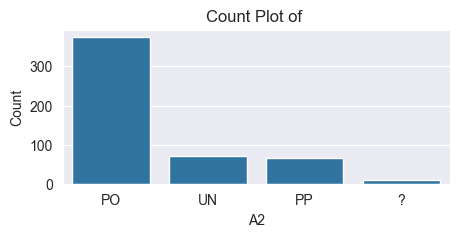

In [71]:
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='A2', order=model_db['A2'].value_counts().index)
plt.xlabel('A2')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

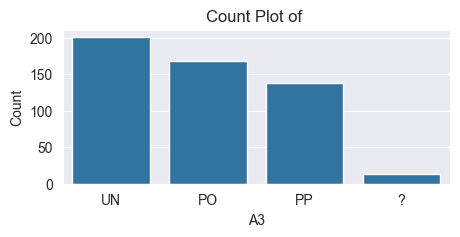

In [72]:
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='A3', order=model_db['A3'].value_counts().index)
plt.xlabel('A3')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

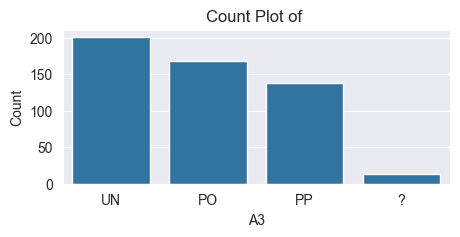

In [73]:
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='A3', order=model_db['A3'].value_counts().index)
plt.xlabel('A3')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

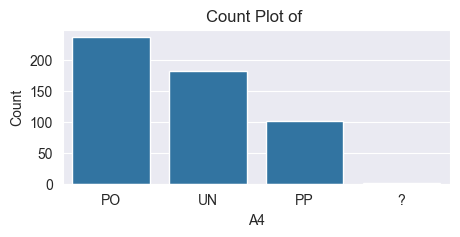

In [74]:
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='A4', order=model_db['A4'].value_counts().index)
plt.xlabel('A4')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

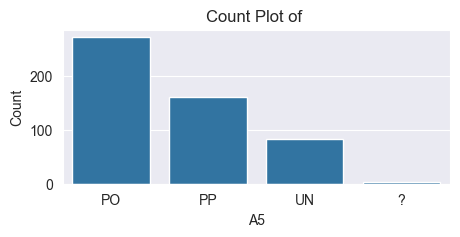

In [75]:
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='A5', order=model_db['A5'].value_counts().index)
plt.xlabel('A5')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

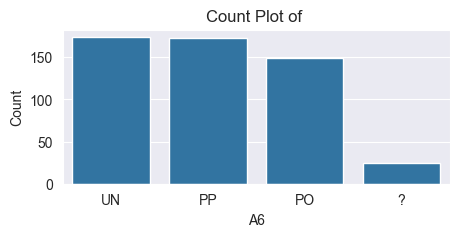

In [76]:
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='A6', order=model_db['A6'].value_counts().index)
plt.xlabel('A6')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

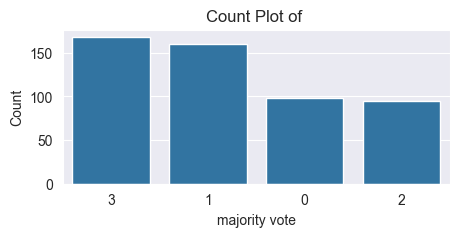

In [77]:
group_map = {'PO':1, 'UN': 0, 'PP': 2, 'NoMajority': 3}
model_db['majority_vote'] = model_db['majority_vote'].map(group_map)
plt.figure(figsize=(5, 2))
sns.countplot(data=model_db, x='majority_vote', order=model_db['majority_vote'].value_counts().index)
plt.xlabel('majority vote')
plt.ylabel('Count')
plt.title('Count Plot of ')
plt.show()

In [85]:
correlation_with_target = model_db.select_dtypes(include=['int', 'float']).corr()['majority_vote'].sort_values(ascending=False)

# Display correlation values
print(correlation_with_target.head(15))

majority_vote    1.000000
mental           0.235511
i                0.230785
emo_neg          0.220430
emo_anx          0.213851
tone_neg         0.209664
emotion          0.185907
Dic              0.159519
Affect           0.138142
Authentic        0.131546
function         0.129463
Linguistic       0.129015
focuspast        0.127536
ppron            0.124717
emo_anger        0.113866
Name: majority_vote, dtype: float64


In [86]:
neg_correlation_with_target = model_db.select_dtypes(include=['int', 'float']).corr()['majority_vote'].sort_values(ascending=True)

# Display correlation values
print(neg_correlation_with_target.head(15))

Tone        -0.199595
Clout       -0.164892
AllPunc     -0.128285
polite      -0.116106
Analytic    -0.103029
they        -0.101999
Lifestyle   -0.100962
OtherP      -0.099903
tone_pos    -0.097413
money       -0.090462
Social      -0.085987
emo_pos     -0.081416
socbehav    -0.080501
Drives      -0.078360
curiosity   -0.077446
Name: majority_vote, dtype: float64
